In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


**ADDING NOISE TO THE IMAGE**

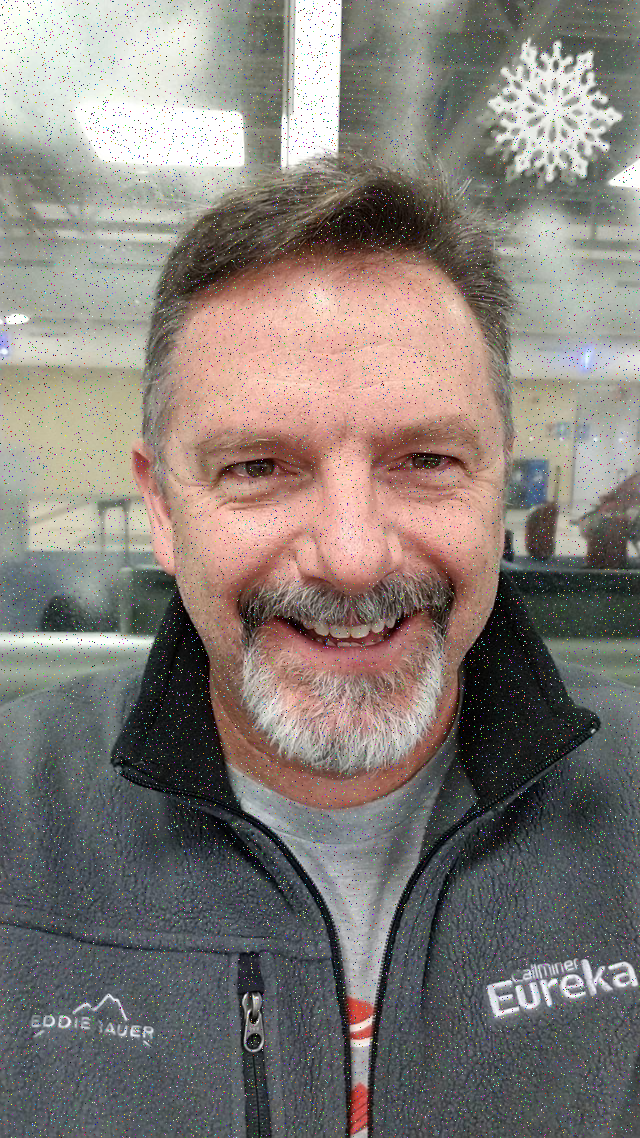

True

In [75]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/gdrive/My Drive/Colab Notebooks/Original.jpg',1)
m, n = img.shape[:2]

#Selecting random pixels and changing their value
import random
img_copy = img
t = int(0.04*m*n)                 #taking 4% of the total pixels
for i in range(0,t):
  index1 = random.randint(0,m-1)
  index2 = random.randint(0,n-1)
  img_copy[index1][index2] = random.sample(range(1,255), 3)

#Displaying and saving the image with added noise
cv2_imshow(img_copy)
cv2.imwrite('/gdrive/My Drive/Colab Notebooks/with_noise.jpg', img_copy)

**READING NOISY IMAGE, INDENTIFYING NOISY PIXELS AND REPLACING THEM**

In [76]:
#Function to find neighbouring pixels of a given pixel
def pixel_neighbours(img_noised, i, j, ni=1, nj=1):
 return img_noised[max(i-ni, 0) : min(i+ni+1, img_noised.shape[0]), \
 max(j-nj, 0) : min(j+nj+1, img_noised.shape[1])]

#Reading the saved noisy image
img_noised = cv2.imread('/gdrive/My Drive/Colab Notebooks/with_noise.jpg',1)
img_mean = img_noised     
img_median = img_noised

#Finding noisy pixels
for i in range(0,img_noised.shape[0]):
  for j in range(0,img_noised.shape[1]):
    neighb = pixel_neighbours(img_noised,i,j)
    r = 0
    g = 0
    b = 0
    r1 = list
    b1 = list
    g1 = list 
    count = 0
    for k in neighb:
      for m1 in k:
        if m1[0]==img_noised[i][j][0] and m1[1]==img_noised[i][j][1] and m1[2]==img_noised[i][j][2]:
          continue
        else:
          #for mean
          r += m1[0]
          g += m1[1]
          b += m1[2]
          #for median
          np.append(r1,m1[0])
          np.append(b1,m1[1])
          np.append(g1,m1[2])
          count += 1

    #Identifying and replacing the noisy pixels using mean
    try:
      r = r/count
      g = g/count
      b = b/count
    
      if (np.abs(img_mean[i][j][0]-r)>20) or (np.abs(img_mean[i][j][1]-g)>20) or (np.abs(img_mean[i][j][2]-b)>20):    # limit of difference between
        img_mean[i][j][0] = r                                                                                         # mean and pixel values has been set to 20
        img_mean[i][j][1] = g
        img_mean[i][j][2] = b
    
    except:
      pass

    #Identifying and replacing the noisy pixels using median
    try:
      if (np.abs(img_median[i][j][0]-np.median(r1)))>20 or (np.abs(img_median[i][j][1]-np.median(b1)))>20 or (np.abs(img_median[i][j][2]-np.median(g1)))>20:    # limit of difference between
        img_median[i][j][0] = np.median(r2)                                                                                                                     # median and pixel values
        img_median[i][j][1] = np.median(b2)                                                                                                                     # has been set to 20
        img_median[i][j][2] = np.median(g2)
    except:
      pass

#Displaying and saving the denoised images
cv2_imshow(img_mean)
cv2_imshow(img_median)
cv2.imwrite('/gdrive/My Drive/Colab Notebooks/denoised_mean.jpg', img_mean)
cv2.imwrite('/gdrive/My Drive/Colab Notebooks/denoised_median.jpg', img_median)

Output hidden; open in https://colab.research.google.com to view.